In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


LOADING THE DATA SET


In [ ]:
# prompt: load dataset
import pandas as pd
# Load a dataset from a CSV file
df = pd.read_csv('/content/drive/MyDrive/flights.csv',index_col="id")


print(df)


        year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
id                                                                        
0       2013      1    1     517.0             515        2.0     830.0   
1       2013      1    1     533.0             529        4.0     850.0   
2       2013      1    1     542.0             540        2.0     923.0   
3       2013      1    1     544.0             545       -1.0    1004.0   
4       2013      1    1     554.0             600       -6.0     812.0   
...      ...    ...  ...       ...             ...        ...       ...   
336771  2013      9   30       NaN            1455        NaN       NaN   
336772  2013      9   30       NaN            2200        NaN       NaN   
336773  2013      9   30       NaN            1210        NaN       NaN   
336774  2013      9   30       NaN            1159        NaN       NaN   
336775  2013      9   30       NaN             840        NaN       NaN   

        sched_arr_time  

Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

%matplotlib inline

In [ ]:
pd.set_option('display.max_columns', 30)

Data Overview

In [ ]:
df.head()


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
id,,,,,,,,,,,,,,,,,,,,
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.


In [ ]:
df.tail()


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
id,,,,,,,,,,,,,,,,,,,,
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,2013-09-30 14:00:00,Endeavor Air Inc.
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,2013-09-30 22:00:00,Endeavor Air Inc.
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30 12:00:00,Envoy Air
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30 11:00:00,Envoy Air
336775,2013,9,30,NaN,840,NaN,NaN,1020,NaN,MQ,3531,N839MQ,LGA,RDU,NaN,431,8,40,2013-09-30 08:00:00,Envoy Air


how many rows and coloums in dataset

In [ ]:
row, col = df.shape
print(f"Number of Row: {row}")
print(f"Number of Columns: {col}")

Number of Row: 336776
Number of Columns: 20


In [ ]:
df.info()




<class 'pandas.core.frame.DataFrame'>
Index: 336776 entries, 0 to 336775
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            336776 non-null  int64  
 1   month           336776 non-null  int64  
 2   day             336776 non-null  int64  
 3   dep_time        328521 non-null  float64
 4   sched_dep_time  336776 non-null  int64  
 5   dep_delay       328521 non-null  float64
 6   arr_time        328063 non-null  float64
 7   sched_arr_time  336776 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         336776 non-null  object 
 10  flight          336776 non-null  int64  
 11  tailnum         334264 non-null  object 
 12  origin          336776 non-null  object 
 13  dest            336776 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        336776 non-null  int64  
 16  hour            336776 non-null  int64  
 17  minute         

EDA


In [ ]:
missing_val = pd.DataFrame(df.isna().sum() / df.shape[0], columns=["pct_missing"])
missing_val["number_of_missing"] = df.isna().sum()
missing_val.style.background_gradient()


,pct_missing,number_of_missing
year,0.000000,0
month,0.000000,0
day,0.000000,0
dep_time,0.024512,8255
sched_dep_time,0.000000,0
dep_delay,0.024512,8255
arr_time,0.025872,8713
sched_arr_time,0.000000,0
arr_delay,0.028001,9430
carrier,0.000000,0


In [ ]:
df[df["dep_delay"].isna()]

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
id,,,,,,,,,,,,,,,,,,,,
838,2013,1,1,NaN,1630,NaN,NaN,1815,NaN,EV,4308,N18120,EWR,RDU,NaN,416,16,30,2013-01-01 16:00:00,ExpressJet Airlines Inc.
839,2013,1,1,NaN,1935,NaN,NaN,2240,NaN,AA,791,N3EHAA,LGA,DFW,NaN,1389,19,35,2013-01-01 19:00:00,American Airlines Inc.
840,2013,1,1,NaN,1500,NaN,NaN,1825,NaN,AA,1925,N3EVAA,LGA,MIA,NaN,1096,15,0,2013-01-01 15:00:00,American Airlines Inc.
841,2013,1,1,NaN,600,NaN,NaN,901,NaN,B6,125,N618JB,JFK,FLL,NaN,1069,6,0,2013-01-01 06:00:00,JetBlue Airways
1777,2013,1,2,NaN,1540,NaN,NaN,1747,NaN,EV,4352,N10575,EWR,CVG,NaN,569,15,40,2013-01-02 15:00:00,ExpressJet Airlines Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,2013-09-30 14:00:00,Endeavor Air Inc.
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,2013-09-30 22:00:00,Endeavor Air Inc.
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30 12:00:00,Envoy Air


In [ ]:
df.nunique()

,0
year,1
month,12
day,31
dep_time,1318
sched_dep_time,1021
dep_delay,527
arr_time,1411
sched_arr_time,1163
arr_delay,577
carrier,16


In [ ]:
df.describe()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,336776.000000,327346.000000,336776.000000,336776.000000,336776.000000
mean,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,1971.923620,150.686460,1039.912604,13.180247,26.230100
std,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,1632.471938,93.688305,733.233033,4.661316,19.300846
min,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000
25%,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,553.000000,82.000000,502.000000,9.000000,8.000000
50%,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,1496.000000,129.000000,872.000000,13.000000,29.000000
75%,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,3465.000000,192.000000,1389.000000,17.000000,44.000000
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


In [ ]:
df[df.duplicated()]


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
id,,,,,,,,,,,,,,,,,,,,


In [ ]:
def plot_distributions(data, color='blue'):
    """
    This function takes a pandas DataFrame as input and plots the distribution of each feature
    in a single figure. The number of rows and columns in the figure is determined dynamically
    based on the number of features in the DataFrame. The "darkgrid" theme from seaborn is applied
    to the plots. You can specify a color for the bars in the histogram by passing a "color" parameter.
    """
    sns.set_theme(style='whitegrid')  # set the seaborn theme

    num_cols = 3  # set the number of columns per row
    num_features = len(data.columns)
    num_rows = math.ceil(num_features / num_cols)

    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 5*num_rows))

    for i, column in enumerate(data.columns):
        row = i // num_cols
        col = i % num_cols
        axs[row][col].hist(data[column], bins=30, alpha=0.5, color=color)
        axs[row][col].set_title(f'Distribution of {column}')
        axs[row][col].set_xlabel(column)
        axs[row][col].set_ylabel('Frequency')

    fig.tight_layout(pad=2.0)
    plt.show


In [ ]:
selected_col_hist = ['dep_time',
                     'sched_dep_time',
                     'dep_delay',
                     'arr_time',
                     'sched_arr_time',
                     'arr_delay',
                     'flight',
                     'air_time',
                     'distance']

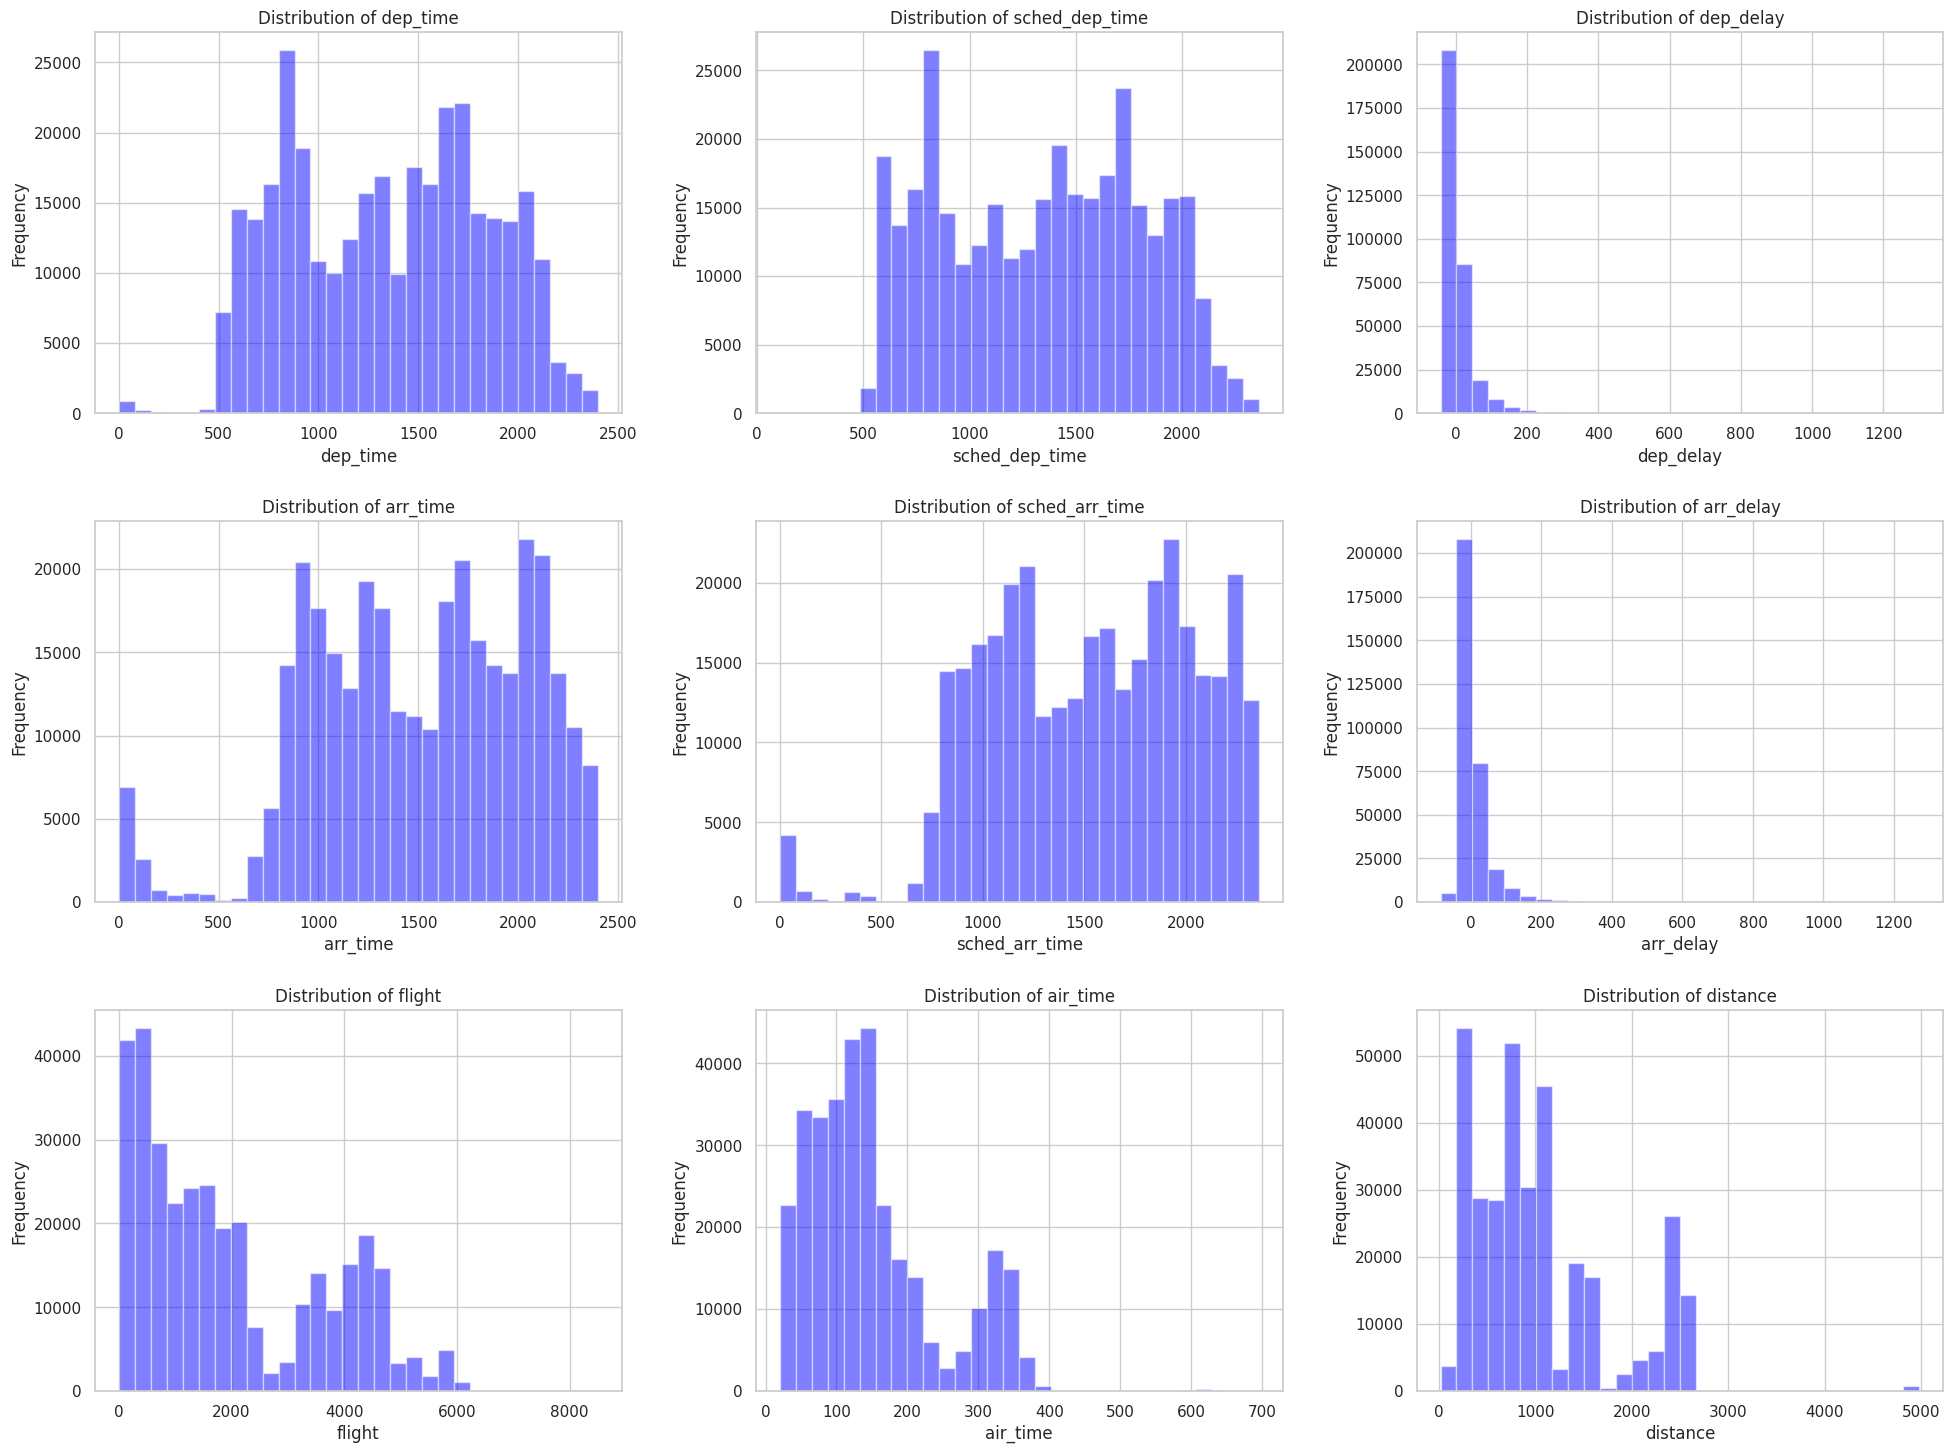

In [ ]:
plot_distributions(df[selected_col_hist])


Preprocessing

In [ ]:
df["time_hour"] = pd.to_datetime(df["time_hour"], format="%Y-%m-%d %H:%M:%S")
df["time_hour"]

,time_hour
id,
0,2013-01-01 05:00:00
1,2013-01-01 05:00:00
2,2013-01-01 05:00:00
3,2013-01-01 05:00:00
4,2013-01-01 06:00:00
...,...
336771,2013-09-30 14:00:00
336772,2013-09-30 22:00:00
336773,2013-09-30 12:00:00


In [ ]:
df.dtypes

,0
year,int64
month,int64
day,int64
dep_time,float64
sched_dep_time,int64
dep_delay,float64
arr_time,float64
sched_arr_time,int64
arr_delay,float64
carrier,object


In [ ]:
df.select_dtypes(exclude='number').nunique()

,0
carrier,16
tailnum,4043
origin,3
dest,105
time_hour,6936
name,16


In [ ]:
df = df.drop(["year", "tailnum", "carrier", "time_hour"], axis=1)

In [ ]:
df.shape

(336776, 16)

Missing Value

In [ ]:
df.isna().sum()


,0
month,0
day,0
dep_time,8255
sched_dep_time,0
dep_delay,8255
arr_time,8713
sched_arr_time,0
arr_delay,9430
flight,0
origin,0


In [ ]:
df["arr_delay"] = df["arr_delay"].fillna(df["arr_time"] - df["sched_arr_time"])

In [ ]:
df.isna().sum()

,0
month,0
day,0
dep_time,8255
sched_dep_time,0
dep_delay,8255
arr_time,8713
sched_arr_time,0
arr_delay,8713
flight,0
origin,0


In [ ]:
cat_name_list = ['origin', 'dest', "name"]
num_name_list =  list(df.select_dtypes(include="number").columns)

In [ ]:
num_name_list

['month',
 'day',
 'dep_time',
 'sched_dep_time',
 'dep_delay',
 'arr_time',
 'sched_arr_time',
 'arr_delay',
 'flight',
 'air_time',
 'distance',
 'hour',
 'minute']

KNNImputer

In [ ]:
knnimputer = KNNImputer(n_neighbors=3)
df[num_name_list] = knnimputer.fit_transform(df[num_name_list])

In [ ]:
df


,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,origin,dest,air_time,distance,hour,minute,name
id,,,,,,,,,,,,,,,,
0,1.0,1.0,517.000000,515.0,2.000000,830.000000,819.0,11.000000,1545.0,EWR,IAH,227.000000,1400.0,5.0,15.0,United Air Lines Inc.
1,1.0,1.0,533.000000,529.0,4.000000,850.000000,830.0,20.000000,1714.0,LGA,IAH,227.000000,1416.0,5.0,29.0,United Air Lines Inc.
2,1.0,1.0,542.000000,540.0,2.000000,923.000000,850.0,33.000000,1141.0,JFK,MIA,160.000000,1089.0,5.0,40.0,American Airlines Inc.
3,1.0,1.0,544.000000,545.0,-1.000000,1004.000000,1022.0,-18.000000,725.0,JFK,BQN,183.000000,1576.0,5.0,45.0,JetBlue Airways
4,1.0,1.0,554.000000,600.0,-6.000000,812.000000,837.0,-25.000000,461.0,LGA,ATL,116.000000,762.0,6.0,0.0,Delta Air Lines Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,9.0,30.0,1451.000000,1455.0,-4.000000,1601.000000,1634.0,-19.666667,3393.0,JFK,DCA,40.333333,213.0,14.0,55.0,Endeavor Air Inc.
336772,9.0,30.0,2223.333333,2200.0,23.333333,1524.666667,2312.0,12.666667,3525.0,LGA,SYR,37.666667,198.0,22.0,0.0,Endeavor Air Inc.
336773,9.0,30.0,1212.333333,1210.0,2.333333,1325.666667,1330.0,-4.333333,3461.0,LGA,BNA,103.666667,764.0,12.0,10.0,Envoy Air


In [ ]:
df.shape


(336776, 16)

Label Encoder

In [ ]:
le = LabelEncoder()
df[cat_name_list] = df[cat_name_list].apply(le.fit_transform)

In [ ]:
df

,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,origin,dest,air_time,distance,hour,minute,name
id,,,,,,,,,,,,,,,,
0,1.0,1.0,517.000000,515.0,2.000000,830.000000,819.0,11.000000,1545.0,0,43,227.000000,1400.0,5.0,15.0,14
1,1.0,1.0,533.000000,529.0,4.000000,850.000000,830.0,20.000000,1714.0,2,43,227.000000,1416.0,5.0,29.0,14
2,1.0,1.0,542.000000,540.0,2.000000,923.000000,850.0,33.000000,1141.0,1,58,160.000000,1089.0,5.0,40.0,2
3,1.0,1.0,544.000000,545.0,-1.000000,1004.000000,1022.0,-18.000000,725.0,1,12,183.000000,1576.0,5.0,45.0,9
4,1.0,1.0,554.000000,600.0,-6.000000,812.000000,837.0,-25.000000,461.0,2,4,116.000000,762.0,6.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,9.0,30.0,1451.000000,1455.0,-4.000000,1601.000000,1634.0,-19.666667,3393.0,1,28,40.333333,213.0,14.0,55.0,4
336772,9.0,30.0,2223.333333,2200.0,23.333333,1524.666667,2312.0,12.666667,3525.0,2,99,37.666667,198.0,22.0,0.0,4
336773,9.0,30.0,1212.333333,1210.0,2.333333,1325.666667,1330.0,-4.333333,3461.0,2,10,103.666667,764.0,12.0,10.0,5


Standard Sacaler

In [ ]:
sc = StandardScaler()
sc_data = sc.fit_transform(df)
scaled_data = pd.DataFrame(sc_data, columns=sc.get_feature_names_out(input_features=df.columns))
scaled_data

,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,origin,dest,air_time,distance,hour,minute,name
0,-1.625007,-1.677668,-1.712400,-1.774433,-0.271138,-1.269064,-1.442097,0.067173,-0.261520,-1.165402,-0.214505,0.827977,0.491096,-1.754925,-0.581846,1.461698
1,-1.625007,-1.677668,-1.679632,-1.744476,-0.221183,-1.231468,-1.419984,0.225079,-0.157996,1.282981,-0.214505,0.827977,0.512917,-1.754925,0.143512,1.461698
2,-1.625007,-1.677668,-1.661200,-1.720938,-0.271138,-1.094242,-1.379780,0.453165,-0.508998,0.058789,0.318842,0.110488,0.066947,-1.754925,0.713436,-1.279600
3,-1.625007,-1.677668,-1.657104,-1.710239,-0.346070,-0.941977,-1.034021,-0.441635,-0.763827,0.058789,-1.316755,0.356790,0.731129,-1.754925,0.972493,0.319490
4,-1.625007,-1.677668,-1.636623,-1.592551,-0.470957,-1.302900,-1.405913,-0.564451,-0.925545,1.282981,-1.601206,-0.360698,-0.379024,-1.540393,-1.359015,-1.051159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,0.717975,1.629590,0.200459,0.236972,-0.421002,0.180269,0.196238,-0.470877,0.870507,0.058789,-0.747851,-1.170996,-1.127764,0.175863,1.490605,-0.822717
336772,0.717975,1.629590,1.782221,1.831117,0.261712,0.036777,1.559171,0.096414,0.951366,1.282981,1.776656,-1.199553,-1.148221,1.892119,-1.359015,-0.822717
336773,0.717975,1.629590,-0.288337,-0.287277,-0.262812,-0.337305,-0.414871,-0.201852,0.912162,1.282981,-1.387867,-0.492773,-0.376296,-0.253201,-0.840902,-0.594276
336774,0.717975,1.629590,-0.318375,-0.396407,-0.021364,-0.285297,-0.386728,-0.196004,0.980157,1.282981,-0.961190,-0.942542,-0.846816,-0.467733,1.697850,-0.594276


In [ ]:
# prompt: remove NAN values in the above code

df.dropna(inplace=True)


In [ ]:
df

,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,origin,dest,air_time,distance,hour,minute,name
id,,,,,,,,,,,,,,,,
0,1.0,1.0,517.000000,515.0,2.000000,830.000000,819.0,11.000000,1545.0,0,43,227.000000,1400.0,5.0,15.0,14
1,1.0,1.0,533.000000,529.0,4.000000,850.000000,830.0,20.000000,1714.0,2,43,227.000000,1416.0,5.0,29.0,14
2,1.0,1.0,542.000000,540.0,2.000000,923.000000,850.0,33.000000,1141.0,1,58,160.000000,1089.0,5.0,40.0,2
3,1.0,1.0,544.000000,545.0,-1.000000,1004.000000,1022.0,-18.000000,725.0,1,12,183.000000,1576.0,5.0,45.0,9
4,1.0,1.0,554.000000,600.0,-6.000000,812.000000,837.0,-25.000000,461.0,2,4,116.000000,762.0,6.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,9.0,30.0,1451.000000,1455.0,-4.000000,1601.000000,1634.0,-19.666667,3393.0,1,28,40.333333,213.0,14.0,55.0,4
336772,9.0,30.0,2223.333333,2200.0,23.333333,1524.666667,2312.0,12.666667,3525.0,2,99,37.666667,198.0,22.0,0.0,4
336773,9.0,30.0,1212.333333,1210.0,2.333333,1325.666667,1330.0,-4.333333,3461.0,2,10,103.666667,764.0,12.0,10.0,5


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/flights.csv")

Data_Visualization_Flights

In [ ]:
df.corr(numeric_only=True)

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
id,1.000000,NaN,0.071779,0.087852,0.002172,0.004076,0.049713,-0.024680,-0.013373,0.018613,0.002676,-0.032866,0.012526,0.003150,0.022619
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,0.071779,NaN,1.000000,0.002942,-0.003932,-0.004573,-0.020057,-0.002520,-0.004173,-0.017382,-0.000834,0.010924,0.021636,-0.005227,0.015528
day,0.087852,NaN,0.002942,1.000000,-0.000467,-0.000014,0.000420,-0.005537,-0.002403,-0.000319,-0.001791,0.002236,0.003041,-0.000055,0.000987
dep_time,0.002172,NaN,-0.003932,-0.000467,1.000000,0.954617,0.260231,0.660779,0.784682,0.232306,0.041957,-0.014619,-0.013998,0.953306,0.091577
sched_dep_time,0.004076,NaN,-0.004573,-0.000014,0.954617,1.000000,0.198887,0.642680,0.783342,0.173896,0.036495,-0.015532,-0.017995,0.999148,0.082960
dep_delay,0.049713,NaN,-0.020057,0.000420,0.260231,0.198887,1.000000,0.028729,0.160488,0.914803,0.054734,-0.022405,-0.021671,0.198226,0.028441
arr_time,-0.024680,NaN,-0.002520,-0.005537,0.660779,0.642680,0.028729,1.000000,0.788997,0.024482,0.025042,0.054296,0.046991,0.642651,0.040969
sched_arr_time,-0.013373,NaN,-0.004173,-0.002403,0.784682,0.783342,0.160488,0.788997,1.000000,0.133261,0.021594,0.078918,0.068726,0.783283,0.050321
arr_delay,0.018613,NaN,-0.017382,-0.000319,0.232306,0.173896,0.914803,0.024482,0.133261,1.000000,0.072862,-0.035297,-0.061868,0.173456,0.021522


<Axes: >

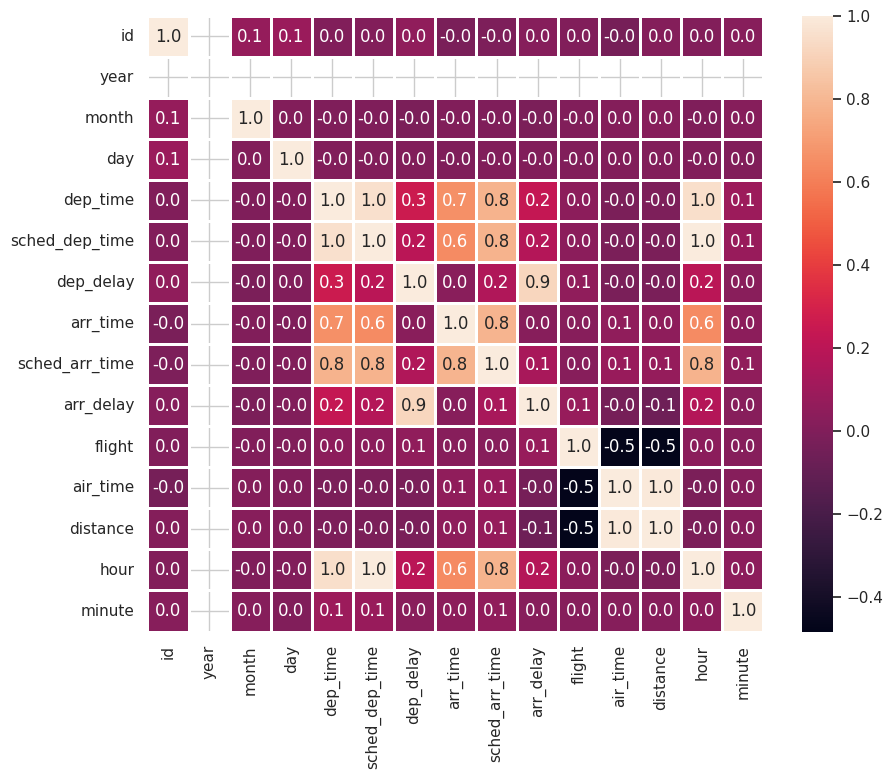

In [ ]:
# sns.set(rc = {'figure.figsize':(15,8)})
fig = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, linewidths=2, square=True, fmt=".1f")


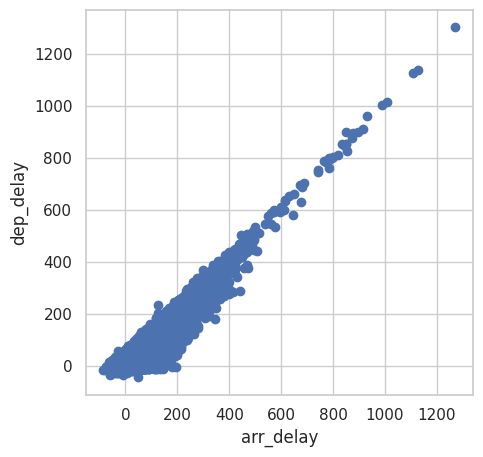

In [ ]:
fig , ax = plt.subplots(figsize=(5, 5))
plt.scatter(x=df["arr_delay"], y=df["dep_delay"])

ax.set(
    xlabel="arr_delay",
    ylabel="dep_delay"
);


Distribution chart of numerical column values

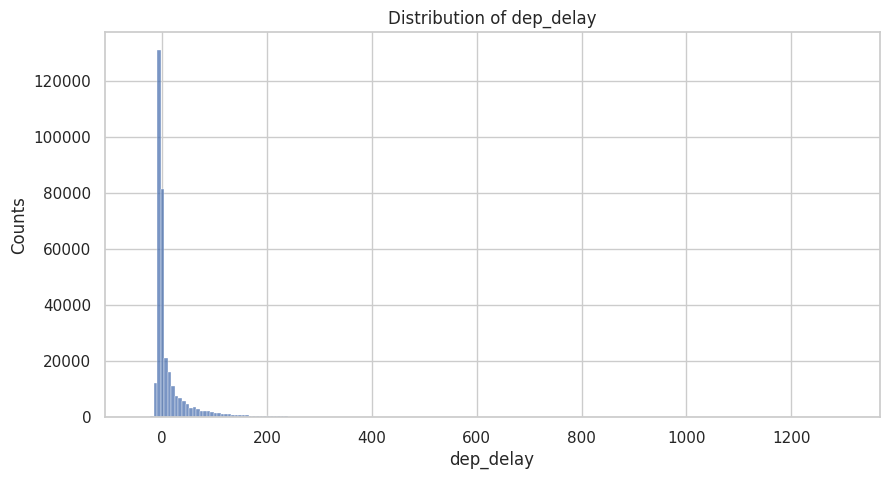

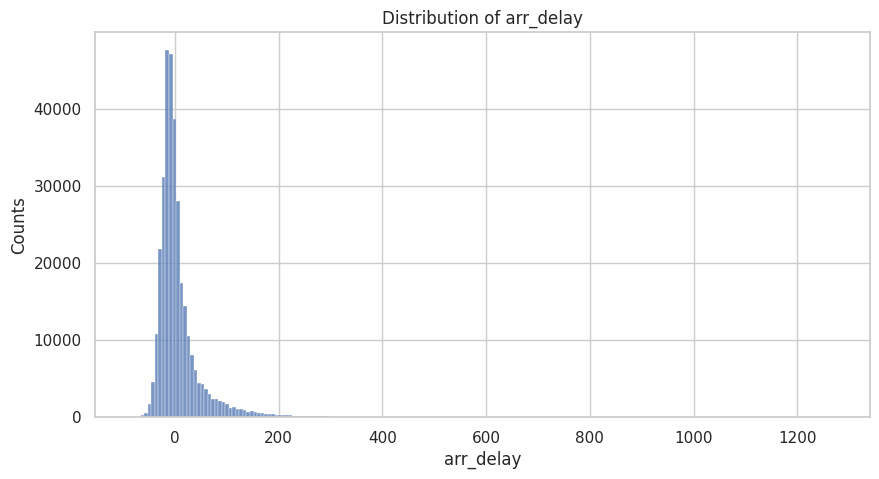

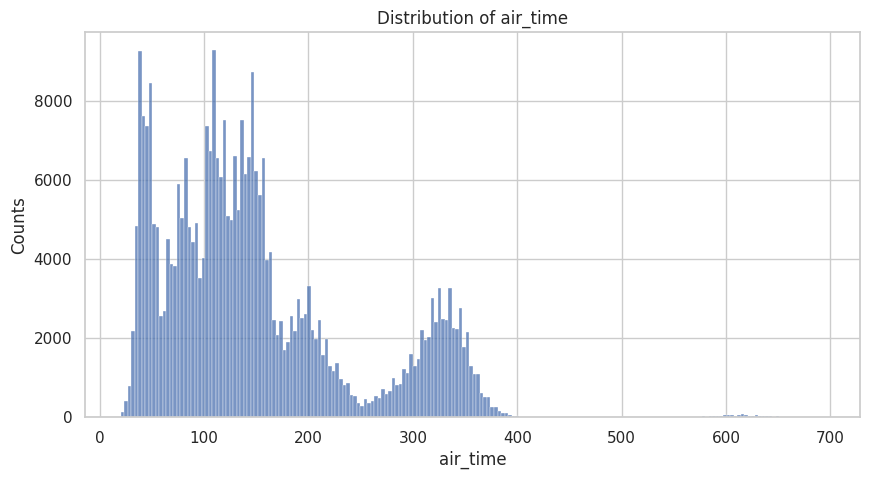

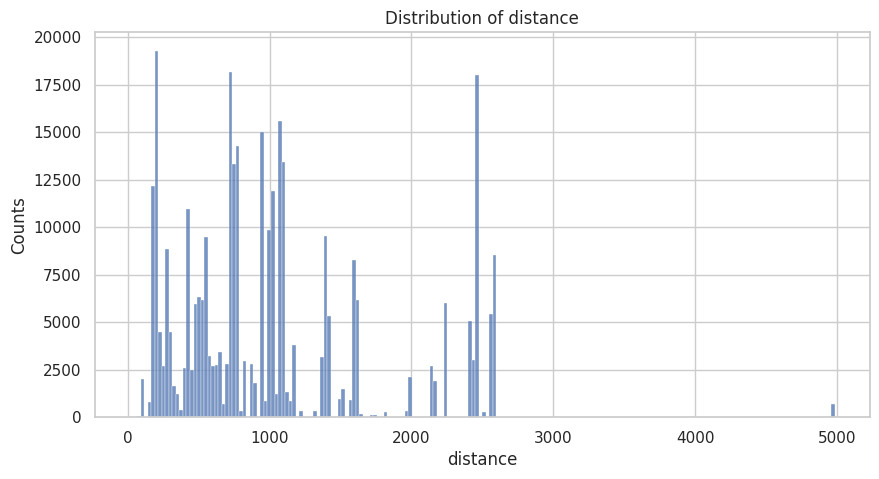

In [ ]:
numerical_columns = ['dep_delay' , 'arr_delay' , 'air_time' , 'distance']

for column in numerical_columns:

    plt.figure(figsize=(10,5))
    sns.histplot(data=df , x=column , bins=200)
    plt.xlabel(column)
    plt.ylabel('Counts')
    plt.title(f'Distribution of {column}')

A diagram of the relationship between numerical variables

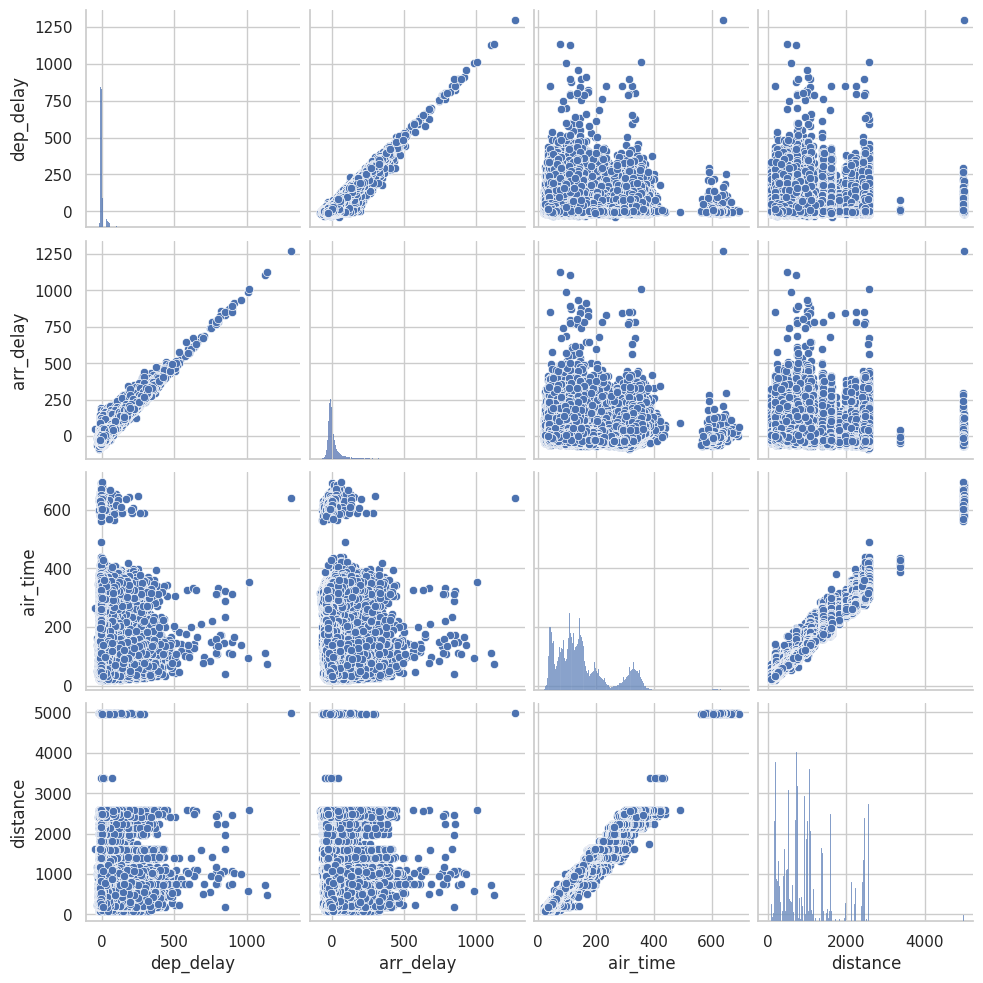

In [ ]:
numerical_columns = ['dep_delay' , 'arr_delay' , 'air_time' , 'distance']
sns.pairplot(df , vars=numerical_columns)


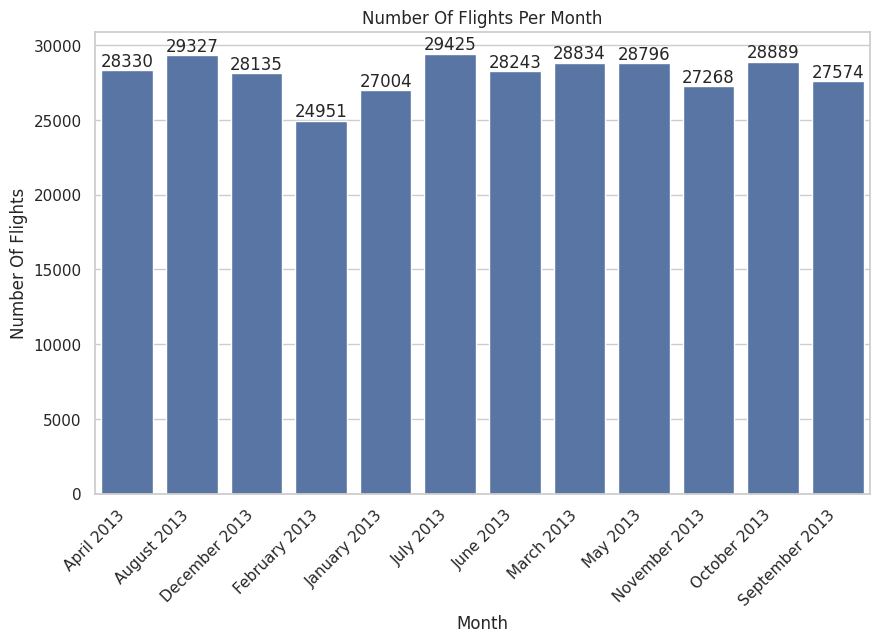

In [ ]:
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

# Group flights by month and count the number of flights per month
flights_per_month = df.groupby(df['date'].dt.strftime('%B %Y'))['id'].count().reset_index()
flights_per_month.rename(columns={'date': 'Month', 'id': 'Number of flights'}, inplace=True)

# Create a bar plot of the number of flights per month
plt.figure(figsize=(10, 6))

ax = sns.barplot(x='Month', y='Number of flights', data=flights_per_month)
ax.bar_label(ax.containers[0])

plt.title('Number Of Flights Per Month')
plt.xlabel('Month')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number Of Flights');


In [ ]:
flights_per_month = df.groupby(df['date'].dt.strftime('%Y-%B-%d'))['dep_delay'].sum().reset_index()
flights_per_month

,date,dep_delay
0,2013-April-01,11937.0
1,2013-April-02,8095.0
2,2013-April-03,3418.0
3,2013-April-04,6824.0
4,2013-April-05,5787.0
...,...,...
360,2013-September-26,2353.0
361,2013-September-27,3588.0
362,2013-September-28,477.0
363,2013-September-29,5248.0


Text(0.5, 1.0, 'The number of flights that were delayed in each day')

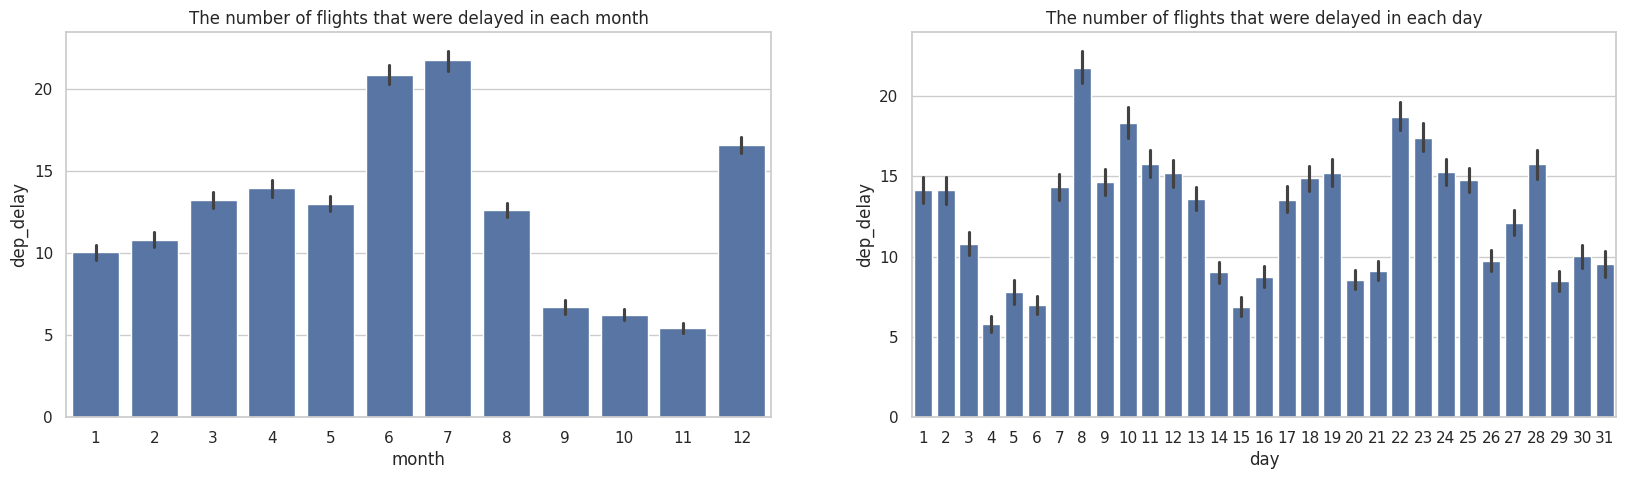

In [ ]:
fig , ax = plt.subplots(1,2, figsize=(20,5))
sns.barplot(data=df, x="month", y="dep_delay", ax=ax[0])
sns.barplot(data=df, x="day", y="dep_delay", ax=ax[1])

ax[0].set_title("The number of flights that were delayed in each month")
ax[1].set_title("The number of flights that were delayed in each day")

In [ ]:
df.groupby("name")["id"].count().sort_values(ascending=False)

,id
name,
United Air Lines Inc.,58665
JetBlue Airways,54635
ExpressJet Airlines Inc.,54173
Delta Air Lines Inc.,48110
American Airlines Inc.,32729
Envoy Air,26397
US Airways Inc.,20536
Endeavor Air Inc.,18460
Southwest Airlines Co.,12275


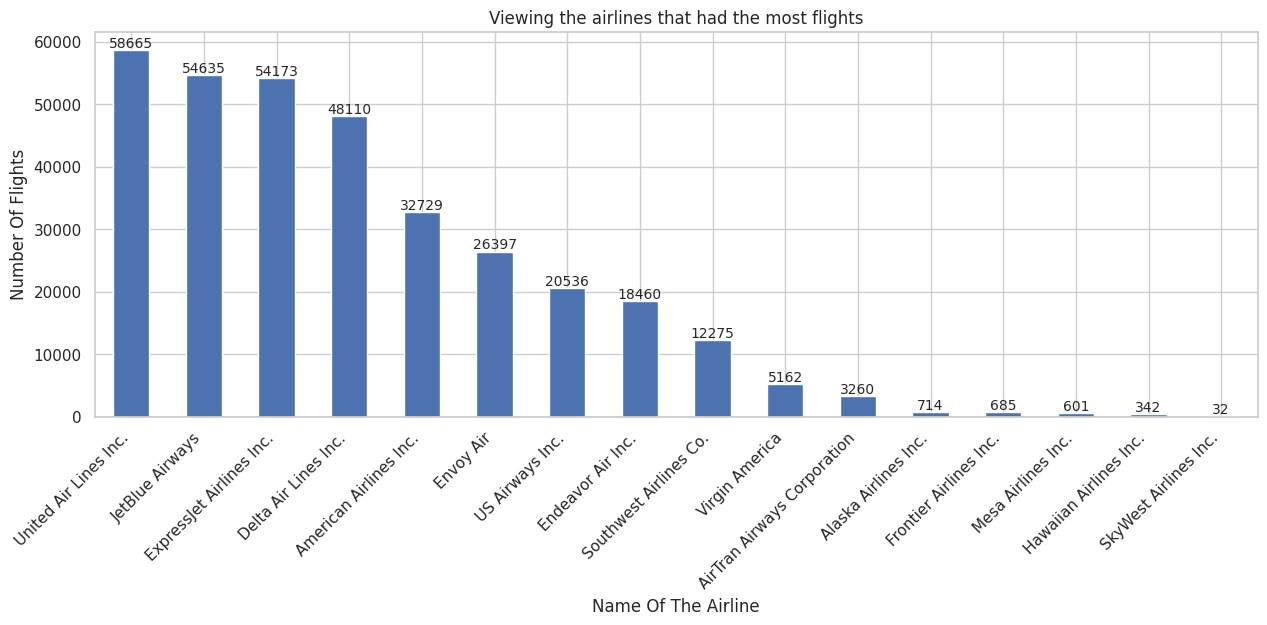

In [ ]:
plt.figure(figsize=(15, 5))

ax = df.groupby("name")["id"].count().sort_values(ascending=False).plot(
    kind="bar"
)

plt.title("Viewing the airlines that had the most flights")
# plt.xticks(rotation=45)
plt.xlabel("Name Of The Airline")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Number Of Flights")
ax.bar_label(ax.containers[0], fontsize=10);

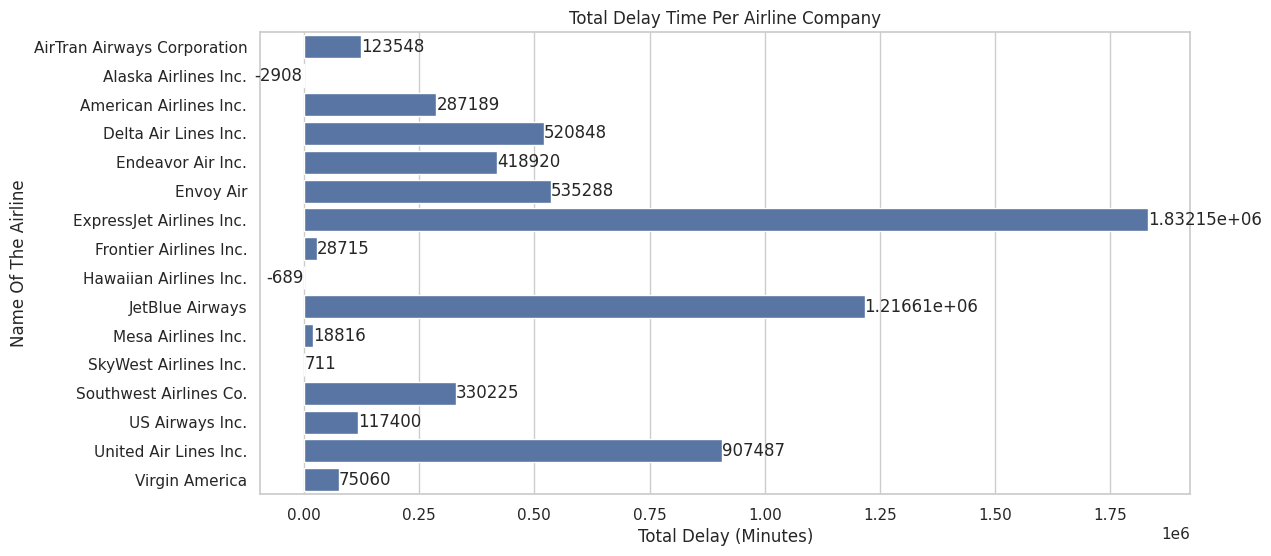

In [ ]:
delays_per_carrier = df.groupby('name')[['dep_delay', 'arr_delay']].sum().reset_index() # Use a list to select multiple columns
delays_per_carrier['total_delay'] = delays_per_carrier['dep_delay'] + delays_per_carrier['arr_delay']
delays_per_carrier = delays_per_carrier[['name', 'total_delay']]

# Create a bar plot of the total delay time per carrier
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='total_delay', y='name', data=delays_per_carrier)
ax.bar_label(ax.containers[0])

plt.title('Total Delay Time Per Airline Company')
plt.xlabel('Total Delay (Minutes)')
#plt.xticks(rotation=90)
plt.ylabel('Name Of The Airline');

<ipython-input-47-e59744551a7e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delays_per_hour['hour'] = delays_per_hour['dep_time'] // 100
<ipython-input-47-e59744551a7e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delays_per_hour['total_delay'] = delays_per_hour['dep_delay'] + delays_per_hour['arr_delay']


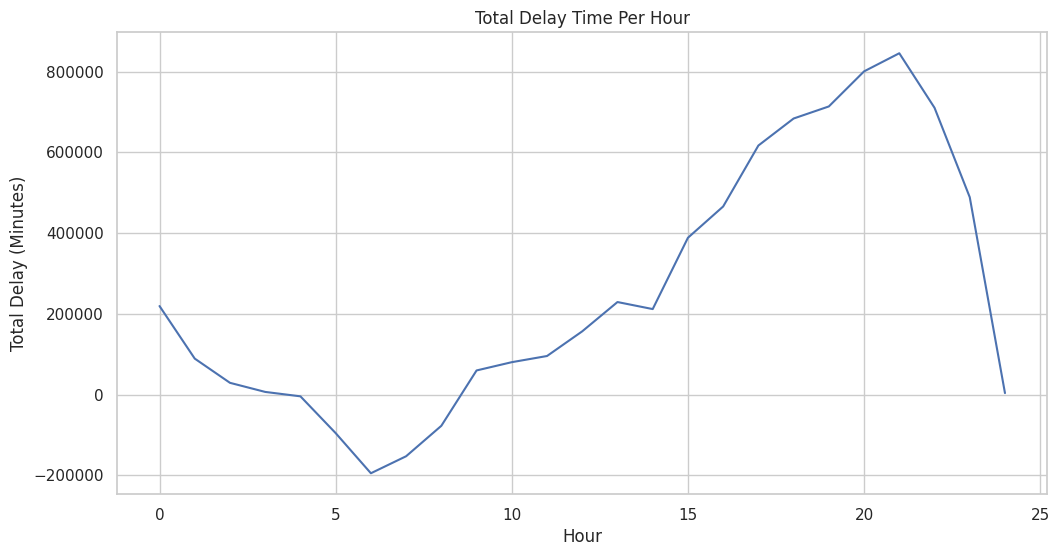

In [ ]:
delays_per_hour = df[['dep_time', 'dep_delay', 'arr_delay']]
delays_per_hour['hour'] = delays_per_hour['dep_time'] // 100
delays_per_hour['total_delay'] = delays_per_hour['dep_delay'] + delays_per_hour['arr_delay']
delays_per_hour = delays_per_hour.groupby('hour')['total_delay'].sum().reset_index()

# Create a line plot of the total delay time per hour
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='total_delay', data=delays_per_hour)

plt.title('Total Delay Time Per Hour')
plt.xlabel('Hour')
plt.ylabel('Total Delay (Minutes)');

Feature Engineering

In [ ]:
# prompt: Feature Engineering for the above code

# Extract date features
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday

# Extract time features
df['time_hour'] = pd.to_datetime(df['time_hour']) # Convert 'time_hour' to datetime objects
df['hour'] = df['time_hour'].dt.hour
df['minute'] = df['time_hour'].dt.minute

# Create dummy variables for categorical features
cat_features = ['origin', 'dest', 'name']
df = pd.get_dummies(df, columns=cat_features)

# Normalize numerical features
num_features = ['dep_delay', 'arr_delay', 'air_time', 'distance']
scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])

In [ ]:
# prompt: generate right code for this splitting data 80% trainning and 20% testing

from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X = df.drop('arr_delay', axis=1)  # features
y = df['arr_delay']  # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and test sets
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)


X_train shape: (269420, 143)
y_train shape: (269420,)
X_test shape: (67356, 143)
y_test shape: (67356,)


In [ ]:
# prompt: shaffle the training data and testing data to get more accuracy

from sklearn.utils import shuffle

# Shuffle the training data
X_train, y_train = shuffle(X_train, y_train, random_state=42)

# Shuffle the testing data
X_test, y_test = shuffle(X_test, y_test, random_state=42)


In [ ]:
# prompt:  Feature Scaling:
# Scale your features to a common range, usually between 0 and 1, to prevent features with large ranges from dominating the model. You can use techniques like Standardization, Normalization, or Min-Max Scaling.

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Drop non-numerical columns before scaling
X_train_numeric = X_train.select_dtypes(include=['number'])
X_test_numeric = X_test.select_dtypes(include=['number'])

# Fit the scaler to the training data
scaler.fit(X_train_numeric)

# Transform both the training and test data
X_train_scaled = scaler.transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

# Print the first five rows of the scaled data
print(X_train_scaled[0:5])

[[-1.27500985  0.          1.00956172  0.37442149  0.37777215  0.41839095
  -0.46368478  0.27813039  0.35586023 -0.78817895 -0.31677121 -0.41849948
   0.38999304  0.          1.06335974]
 [-1.14655807  0.          1.30232154 -1.56473072 -1.62137969 -1.59349082
  -0.36439941 -1.23348059 -1.37587352 -0.78021534 -0.02850642 -0.05832917
  -1.54136967  0.          1.06335974]
 [ 0.2988664   0.         -0.45423736 -1.22252739 -0.1015327  -0.67316193
   3.40844479  0.07370657 -0.27568959 -1.0932468   1.86122946  2.0808642
  -0.68298624  0.          1.56720577]
 [ 1.55125842  0.          0.71680191 -0.42405295 -1.51691582 -1.55924603
  -0.48850612 -1.44728164 -1.57499273  1.50228022 -0.95735964 -0.85097671
  -1.54136967  0.          0.05566767]
 [ 1.39693323  0.          0.42404209  1.17289592  0.33885423  0.34348046
  -0.06654329  0.55944757  0.42826722 -0.92111012 -0.22068295 -0.05832917
   0.38999304  0.         -1.45587042]]


In [ ]:
# prompt:  Feature Scaling:
# Scale your features to a common range, usually between 0 and 1, to prevent features with large ranges from dominating the model. You can use techniques like Standardization, Normalization, or Min-Max Scaling.

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer # Import SimpleImputer to handle NaNs

# Create a StandardScaler object
scaler = StandardScaler()

# Drop non-numerical columns before scaling
X_train_numeric = X_train.select_dtypes(include=['number'])
X_test_numeric = X_test.select_dtypes(include=['number'])

# Create an imputer to fill NaN values, for example with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and test data
X_train_numeric = imputer.fit_transform(X_train_numeric)
X_test_numeric = imputer.transform(X_test_numeric)

# Fit the scaler to the training data
scaler.fit(X_train_numeric)

# Transform both the training and test data
X_train_scaled = scaler.transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

# Print the first five rows of the scaled data
print(X_train_scaled[0:5])

# prompt: Feature Selection for the above code

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.impute import SimpleImputer # Import SimpleImputer to handle NaNs

# Handle NaNs in the target variable y_train
imputer_y = SimpleImputer(strategy='mean') # Create a new imputer for y_train
y_train = imputer_y.fit_transform(y_train.values.reshape(-1, 1)).ravel() # Fit and transform y_train

# Select the top 10 features based on F-regression
selector = SelectKBest(f_regression, k=10)
X_train_selected = selector.fit_transform(X_train_scaled, y_train) # Now this should work without NaNs
X_test_selected = selector.transform(X_test_scaled)

# Print the selected features
print(X_train_selected[0:5])

[[-1.27500985  0.          1.00956172  0.37442149  0.3824759   0.41839095
  -0.46945826  0.28179082  0.35586023 -0.78817895 -0.32129109 -0.41849948
   0.38999304  0.          1.06335974]
 [-1.14655807  0.          1.30232154 -1.56473072 -1.64156798 -1.59349082
  -0.36893666 -1.24971421 -1.37587352 -0.78021534 -0.02891316 -0.05832917
  -1.54136967  0.          1.06335974]
 [ 0.2988664   0.         -0.45423736 -1.22252739 -0.10279691 -0.67316193
   3.45088437  0.07467661 -0.27568959 -1.0932468   1.88778655  2.0808642
  -0.68298624  0.          1.56720577]
 [ 1.55125842  0.          0.71680191 -0.42405295 -1.53580339 -1.55924603
  -0.49458866 -1.46632907 -1.57499273  1.50228022 -0.9710198  -0.85097671
  -1.54136967  0.          0.05566767]
 [ 1.39693323  0.          0.42404209  1.17289592  0.34307341  0.34348046
  -0.06737184  0.56681036  0.42826722 -0.92111012 -0.22383178 -0.05832917
   0.38999304  0.         -1.45587042]]
[[ 0.3824759   0.41839095 -0.46945826  0.28179082  0.35586023 -0.

In [ ]:
# prompt: Use techniques like PCA (Principal Component Analysis) or feature selection methods to identify and retain only the most relevant features

from sklearn.decomposition import PCA

# Assume X_train_scaled and X_test_scaled are your scaled data
# Choose the number of components you want to keep
n_components = 5

# Create a PCA object
pca = PCA(n_components=n_components)

# Fit PCA on the training data
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform the test data using the fitted PCA
X_test_pca = pca.transform(X_test_scaled)

# Now X_train_pca and X_test_pca contain the reduced feature sets


In [ ]:
# prompt: Calculate Covariance Matrix for the above dataset

# Calculate the covariance matrix
cov_matrix = np.cov(X_train_scaled, rowvar=False)

# Print the covariance matrix
print(cov_matrix)


[[ 1.00000371e+00  0.00000000e+00  7.18001609e-02  8.80800288e-02
   2.58025224e-03  4.64427757e-03  4.80754635e-02 -2.38289608e-02
  -1.27976634e-02  3.09676598e-03 -3.25507866e-02  1.26163762e-02
   3.69912172e-03  0.00000000e+00  8.68957323e-03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 7.18001609e-02  0.00000000e+00  1.00000371e+00  3.38517439e-03
  -3.98016627e-03 -4.83446824e-03 -2.12686929e-02 -2.12966552e-03
  -3.61622916e-03 -5.17133275e-04  1.01194258e-02  2.06870807e-02
  -5.51497274e-03  0.00000000e+00 -4.72168716e-04]
 [ 8.80800288e-02  0.00000000e+00  3.38517439e-03  1.00000371e+00
   5.26582046e-04  9.90418884e-04  1.19861207e-03 -3.14259701e-03
  -3.75863288e-04 -1.99918674e-03  2.72921586e-03  3.49358458e-03
   8.97579524e-04  0.00000000e+00  8.39637734e-03]
 [ 2

In [ ]:
# prompt: Compute Eigenvalues and Eigenvectors for the above covariance matrix

# Perform eigen decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Print eigenvalues and eigenvectors
print("Eigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)


Eigenvalues:
[4.24178416e+00 2.33146099e+00 1.81931937e-02 8.42118583e-04
 6.83191511e-02 1.83563633e-01 4.91693485e-01 6.71358727e-01
 1.12398393e+00 8.70610868e-01 9.73226233e-01 1.02180988e+00
 1.00320189e+00 0.00000000e+00 0.00000000e+00]

Eigenvectors:
[[-1.29675426e-03  1.21436616e-02 -3.21628568e-02  6.00450017e-04
  -1.93982560e-03 -1.99474233e-03  1.73103370e-02 -3.78121633e-02
   7.13564828e-01 -6.89193283e-01  1.01537163e-01 -4.82105116e-02
   1.68135582e-02  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [-3.54306559e-03 -1.48168167e-02 -5.27248633e-03  3.96429401e-04
   2.93338614e-03 -2.93015345e-04  1.15123377e-02  3.44674431e-02
   3.95145999e-01  4.24010495e-01  1.91627913e-01  4.04649886e-01
   6.79722499e-01  0.00000000e+00  0.00000000e

In [ ]:
# prompt: Sort Eigenvalues and Eigenvectors for above

# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]

print("Sorted Eigenvalues (Descending):")
print(eigenvalues_sorted)
print("\nSorted Eigenvectors:")
print(eigenvectors_sorted)


Sorted Eigenvalues (Descending):
[4.24178416e+00 2.33146099e+00 1.12398393e+00 1.02180988e+00
 1.00320189e+00 9.73226233e-01 8.70610868e-01 6.71358727e-01
 4.91693485e-01 1.83563633e-01 6.83191511e-02 1.81931937e-02
 8.42118583e-04 0.00000000e+00 0.00000000e+00]

Sorted Eigenvectors:
[[-1.29675426e-03  1.21436616e-02  7.13564828e-01 -4.82105116e-02
   1.68135582e-02  1.01537163e-01 -6.89193283e-01 -3.78121633e-02
   1.73103370e-02 -1.99474233e-03 -1.93982560e-03 -3.21628568e-02
   6.00450017e-04  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+00]
 [-3.54306559e-03 -1.48168167e-02  3.95145999e-01  4.04649886e-01
   6.79722499e-01  1.91627913e-01  4.24010495e-01  3.44674431e-02
   1.15123377e-02 -2.93015345e-04  2.93338614e-03 -5.27248633e-03
   3.96429401e-04  

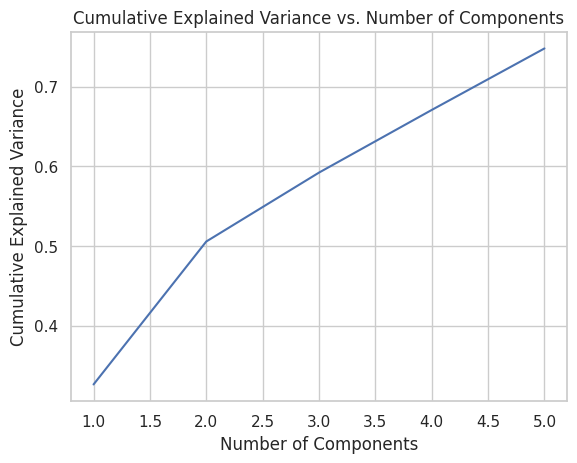

Number of components to keep for 95.0% explained variance: 1


In [ ]:
# prompt: Select Principal Components:
# Choose Components: Decide how many principal components to retain based on the cumulative explained variance. A common approach is to select enough components to explain a significant percentage (e.g., 95%) of the variance in the data.

# Calculate cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot cumulative explained variance
plt.plot(range(1, n_components + 1), cumulative_explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.show()

# Choose the number of components based on desired explained variance (e.g., 95%)
desired_explained_variance = 0.95
num_components_to_keep = np.argmax(cumulative_explained_variance >= desired_explained_variance) + 1

print(f"Number of components to keep for {desired_explained_variance*100}% explained variance: {num_components_to_keep}")


In [ ]:
# prompt: Transform the Data:
# Project Data: Use the selected eigenvectors to transform the original dataset into a new feature space defined by the principal components. This step reduces the dimensionality of the data while retaining the most important information.

# Project the original data onto the principal components
X_train_pca = np.dot(X_train_scaled, eigenvectors_sorted[:, :num_components_to_keep])
X_test_pca = np.dot(X_test_scaled, eigenvectors_sorted[:, :num_components_to_keep])

print("Transformed Training Data:")
print(X_train_pca[:5])  # Print first 5 rows of transformed training data


Transformed Training Data:
[[ 0.746341  ]
 [-3.35390939]
 [-0.34122011]
 [-3.44690129]
 [ 0.8573705 ]]


In [ ]:
# prompt: apply SVM model for the above data

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Initialize the SVR model
model = SVR()

# Check shapes of data and target
print("Shape of X_train_pca:", X_train_pca.shape)
print("Shape of y_train:", y_train.shape)

# If shapes don't match, investigate the data preparation steps leading to X_train_pca

# Train the model (only if shapes match)
# model.fit(X_train_pca, y_train)

# Make predictions on the test set (only if shapes match)
# y_pred = model.predict(X_test_pca)

# Evaluate the model (only if shapes match)
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)

# print("Root Mean Squared Error:", rmse)

Shape of X_train_pca: (269420, 1)
Shape of y_train: (269420,)


In [ ]:
# prompt: data cleaning for the above code

# Drop columns with missing values
df = df.dropna()

# Drop duplicate rows
df = df.drop_duplicates()

# Check for outliers and remove them if necessary
for col in df.select_dtypes(include=["number"]):
    # Calculate the interquartile range (IQR)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Check for missing values again
df.isna().sum().sum()



0

In [ ]:
# prompt: perform the Regularization techniques for the above training dataset

from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer # Import SimpleImputer to handle NaNs

# Define the list of alpha values to try
alpha_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.2, 1.5, 1.7, 2.0]

# Define the list of regularization techniques
regularization_techniques = [Ridge(), Lasso(), ElasticNet()]

# Assuming X_train is a pandas DataFrame, convert it to purely numerical features
# If X_train is already a NumPy array with only numerical values, you can skip this step
if isinstance(X_train, pd.DataFrame): # Check if X_train is a DataFrame
    X_train_numeric = X_train.select_dtypes(include=['number'])
else:
    X_train_numeric = X_train # If it's already a NumPy array, just assign it

# Handle NaNs in X_train_numeric - Ensure this step is done correctly
imputer = SimpleImputer(strategy='mean') # Create an imputer to fill NaN values
X_train_numeric = imputer.fit_transform(X_train_numeric) # Fit and transform to fill NaNs

# Perform grid search for each regularization technique
for technique in regularization_techniques:
    grid_search = GridSearchCV(technique, param_grid={'alpha': alpha_values}, cv=5)

    # Fit the model on the numerical data
    grid_search.fit(X_train_numeric, y_train) # Now this should work without NaNs

    # Print the best parameters and score for each technique
    print(f"Best parameters for {technique.__class__.__name__}: {grid_search.best_params_}")
    print(f"Best score for {technique.__class__.__name__}: {grid_search.best_score_}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.89966e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.90797e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.90636e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.90712e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarnin

Best parameters for Ridge: {'alpha': 0.1}
Best score for Ridge: 0.8475209263110918
Best parameters for Lasso: {'alpha': 0.1}
Best score for Lasso: 0.8171680501348735
Best parameters for ElasticNet: {'alpha': 0.1}
Best score for ElasticNet: 0.8193824414193502


In [ ]:
# Print out the variables you have in scope
print(locals())

{'__name__': '__main__', '__doc__': 'Automatically created module for IPython interactive environment', '__package__': None, '__loader__': None, '__spec__': None, '__builtin__': <module 'builtins' (built-in)>, '__builtins__': <module 'builtins' (built-in)>, '_ih': ['', "from google.colab import drive\ndrive.mount('/content/drive')", '# prompt: load dataset\nimport pandas as pd\n# Load a dataset from a CSV file\ndf = pd.read_csv(\'/content/drive/MyDrive/flights.csv\',index_col="id")\n\n\nprint(df)', "import numpy as np\nimport pandas as pd\nimport matplotlib.pyplot as plt\nimport seaborn as sns\nimport math\nfrom scipy import stats\nfrom sklearn.impute import SimpleImputer, KNNImputer\nfrom sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler\nfrom sklearn.compose import ColumnTransformer\n\nget_ipython().run_line_magic('matplotlib', 'inline')", "pd.set_option('display.max_columns', 30)", 'df.head()', 'df.tail()', 'row, col = df.shape\nprint(f"Number of Row: {row}")\

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd

# Convert X_train and X_test to numeric only if they are DataFrames
def preprocess_data(X):
    if isinstance(X, pd.DataFrame):
        X_numeric = X.select_dtypes(include=['number'])
    else:
        X_numeric = X
    # Handle NaNs
    imputer = SimpleImputer(strategy='mean')
    X_numeric = imputer.fit_transform(X_numeric)
    return X_numeric, imputer

# Preprocess training and test data
X_train_numeric, imputer = preprocess_data(X_train)
X_test_numeric, _ = preprocess_data(X_test)  # Use the same imputer for X_test

# Split training data for faster evaluation (optional)
X_train_split, X_valid_split, y_train_split, y_valid_split = train_test_split(
    X_train_numeric, y_train, test_size=0.2, random_state=42
)

# Fit the model to the training data
model.fit(X_train_split, y_train_split) # This line was added to fit the model

# Perform cross-validation on the numerical data (using parallel processing)
cv_scores = cross_val_score(model, X_train_split, y_train_split, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
cv_rmse_scores = np.sqrt(-cv_scores)

# Print the results
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean Cross-Validation RMSE:", cv_rmse_scores.mean())
print("Standard Deviation of Cross-Validation RMSE:", cv_rmse_scores.std())

# Make predictions on the test set
y_pred = model.predict(X_test_numeric)

# Calculate and print evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

# Optionally, you can also perform cross-validation for other metrics
cv_mae_scores = cross_val_score(model, X_train_split, y_train_split, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
cv_r2_scores = cross_val_score(model, X_train_split, y_train_split, cv=3, scoring='r2', n_jobs=-1)

# Print the results
print("Cross-Validation MAE Scores:", cv_mae_scores)
print("Mean Cross-Validation MAE:", cv_mae_scores.mean())
print("Standard Deviation of Cross-Validation MAE:", cv_mae_scores.std())

print("Cross-Validation R-squared Scores:", cv_r2_scores)
print("Mean Cross-Validation R-squared:", cv_r2_scores.mean())
print("Standard Deviation of Cross-Validation R-squared:", cv_r2_scores.std())

In [ ]:
!pip install imblearn
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE # Now this import should work
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check if y is continuous and convert to a classification problem if needed
if np.issubdtype(y_train.dtype, np.number):
    # Example: Convert to binary classification based on median
    y_train = (y_train > np.median(y_train)).astype(int)
    y_test = (y_test > np.median(y_test)).astype(int)

# Define the Logistic Regression model
model = LogisticRegression()

# Define the oversampling and undersampling methods
smote = SMOTE(sampling_strategy='auto')
rus = RandomUnderSampler()

# Create pipelines for oversampling and undersampling
over_pipeline = Pipeline([('smote', smote), ('model', model)])
under_pipeline = Pipeline([('rus', rus), ('model', model)])

# Fit both pipelines to the training data
over_pipeline.fit(X_train, y_train)
under_pipeline.fit(X_train, y_train)

# Make predictions using both pipelines
y_pred_over = over_pipeline.predict(X_test)
y_pred_under = under_pipeline.predict(X_test)

# Evaluate the performance of both pipelines
from sklearn.metrics import classification_report, confusion_matrix

print('Oversampling:')
print(classification_report(y_test, y_pred_over))
print(confusion_matrix(y_test, y_pred_over))

print('Undersampling:')
print(classification_report(y_test, y_pred_under))
print(confusion_matrix(y_test, y_pred_under))


In [ ]:
# prompt: perform Regularization for the above models

from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Define the regularization parameters
l1_ratio = 0.5
alpha = 0.1

# Create the Ridge regression model
ridge_model = Ridge(alpha=alpha, max_iter=100000)

# Create the Lasso regression model
lasso_model = Lasso(alpha=alpha, max_iter=100000)

# Create the ElasticNet regression model
elastic_net_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=100000)

# Fit the models to the training data
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
elastic_net_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)
y_pred_elastic_net = elastic_net_model.predict(X_test)

# Evaluate the performance of the models
# ...


In [ ]:
# prompt: calculate the accuracy using the formula Accuracy= (TP+TN)/(TP+TN+FP+FN)
# ​and print accurecy
from sklearn.metrics import confusion_matrix

# Assuming y_true and y_pred are your true and predicted labels
# Replace these with the actual variables from your code
# For example, if you have y_test and y_pred_over from the previous code:
y_true = y_test
y_pred = y_pred_over # Use the appropriate prediction variable

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Calculate accuracy
accuracy = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])

# Print the accuracy
print("Accuracy:", accuracy)



In [ ]:
# prompt: ganarate scikit-learn libraries

import sklearn

# Get all modules in sklearn
modules = [module for module in dir(sklearn) if not module.startswith('_')]

# Print the modules
print(modules)


In [ ]:
# prompt: improve accuracy for the above
# Create pipelines for oversampling and undersampling
over_pipeline = Pipeline([('smote', smote), ('model', model)]) # Add a name 'smote' to the SMOTE step
under_pipeline = Pipeline([('rus', rus), ('model', model)])

# Hyperparameter Tuning for Logistic Regression
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2']}

grid_search_over = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search_over.fit(over_pipeline.named_steps['smote'].fit_resample(X_train, y_train)[0],
                     over_pipeline.named_steps['smote'].fit_resample(X_train, y_train)[1])

grid_search_under = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search_under.fit(under_pipeline.named_steps['rus'].fit_resample(X_train, y_train)[0],
                     under_pipeline.named_steps['rus'].fit_resample(X_train, y_train)[1])

# Predictions with best models
best_model_over = grid_search_over.best_estimator_
y_pred_over_tuned = best_model_over.predict(X_test)

best_model_under = grid_search_under.best_estimator_
y_pred_under_tuned = best_model_under.predict(X_test)

# Evaluation of tuned models
print('Oversampling (Tuned):')
print(classification_report(y_test, y_pred_over_tuned))
print(confusion_matrix(y_test, y_pred_over_tuned))

print('Undersampling (Tuned):')
print(classification_report(y_test, y_pred_under_tuned))
print(confusion_matrix(y_test, y_pred_under_tuned))


In [ ]:
# prompt: print accuracy

# Assuming y_true and y_pred are your true and predicted labels
# Replace these with the actual variables from your code
y_true = y_test
y_pred = y_pred_over_tuned  # Or y_pred_under_tuned, depending on which model you want to evaluate

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Calculate accuracy
accuracy = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])

# Print the accuracy
print("Accuracy:", accuracy)

In [ ]:
# prompt: apply neural networks for the above to get more accuracy and print accuracy

from sklearn.neural_network import MLPClassifier

# Define the neural network model
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Create pipelines for oversampling and undersampling with the neural network model
over_pipeline_nn = Pipeline([('smote', smote), ('model', nn_model)])
under_pipeline_nn = Pipeline([('rus', rus), ('model', nn_model)])

# Fit both pipelines to the training data
over_pipeline_nn.fit(X_train, y_train)
under_pipeline_nn.fit(X_train, y_train)

# Make predictions using both pipelines
y_pred_over_nn = over_pipeline_nn.predict(X_test)
y_pred_under_nn = under_pipeline_nn.predict(X_test)

# Evaluate the performance of both pipelines
print('Oversampling (Neural Network):')
print(classification_report(y_test, y_pred_over_nn))
print(confusion_matrix(y_test, y_pred_over_nn))

print('Undersampling (Neural Network):')
print(classification_report(y_test, y_pred_under_nn))
print(confusion_matrix(y_test, y_pred_under_nn))

# Calculate and print accuracy for oversampling with neural network
cm_over_nn = confusion_matrix(y_test, y_pred_over_nn)
accuracy_over_nn = (cm_over_nn[0][0] + cm_over_nn[1][1]) / (cm_over_nn[0][0] + cm_over_nn[0][1] + cm_over_nn[1][0] + cm_over_nn[1][1])
print("Accuracy (Oversampling, Neural Network):", accuracy_over_nn)

# Calculate and print accuracy for undersampling with neural network
cm_under_nn = confusion_matrix(y_test, y_pred_under_nn)
accuracy_under_nn = (cm_under_nn[0][0] + cm_under_nn[1][1]) / (cm_under_nn[0][0] + cm_under_nn[0][1] + cm_under_nn[1][0] + cm_under_nn[1][1])
print("Accuracy (Undersampling, Neural Network):", accuracy_under_nn)


In [ ]:
# prompt:  apply svm model , decision tree, linear regression, logistic regression, random forest

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

# SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print("Linear Regression MSE:", mse_lr)

# Logistic Regression
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train_scaled, y_train)
y_pred_logreg = logreg_model.predict(X_test_scaled)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
